In [1]:
## import necessary libraries
import os
import pandas as pd
from xgboost_prediction.build_predict_model import train_and_save_model, predict_with_model
from xgboost_prediction.visualize_model import plot_feature_importance, plot_tree_structure 

/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Paths for data and model files
example36_path = 'example_data/example36.csv'
model36_path = 'example_data/xgbmodel_36.json'
example201_path = 'example_data/example201.csv'
model201_path = 'example_data/xgbmodel_201.json'

- Fewer features mean that the model has less information to work with, which may limit its capacity to capture intricate patterns, especially if some important information is missing or aggregated in fewer features.
- With a smaller number of features, it becomes challenging to represent the data well, especially if those features don’t capture the critical variations needed to classify the data effectively. 

In [3]:
params = {
        'objective': 'binary:logistic',
        'learning_rate': 0.1,
        'max_depth': 5,
        'eval_metric': 'logloss'
    }


Predicting for 36 features:
>> Model file example_data/xgbmodel_36.json not found. Training model....
>> XGBoost Test Accuracy (36 features): 0.777778
>> Misclassified Samples (36 features): 2
>> SHAP Summary Plot (Top 10 Global Feature Importance):


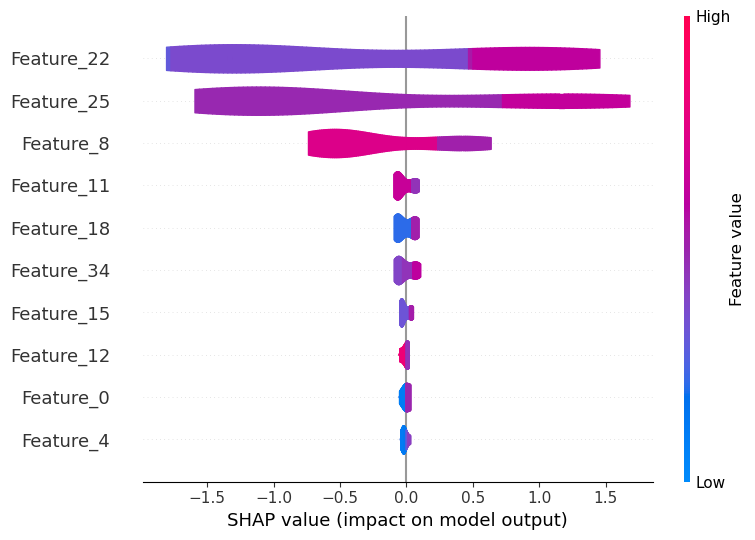

<Figure size 640x480 with 0 Axes>

In [4]:
# Perform predictions
print("Predicting for 36 features:")
# Load training data
data = pd.read_csv(example36_path, header=None, sep=',').dropna()
X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0]          # Labels

fig = predict_with_model(X, y, model36_path, feature_count=36, params=params, output_shap_plot=True, plot_type='shap_summary')

<Figure size 3000x2400 with 0 Axes>

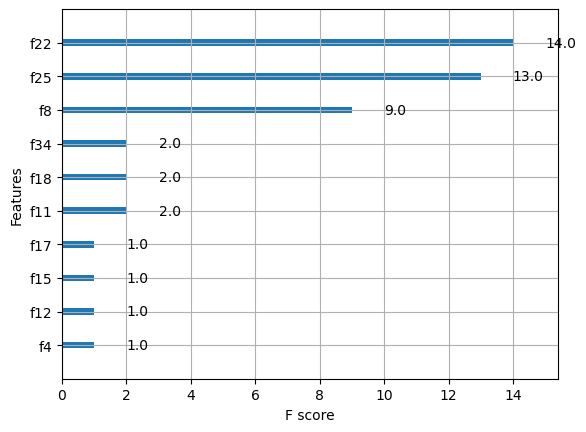

<module 'matplotlib.pyplot' from '/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [5]:
plot_feature_importance(model36_path)
# visualize_model(model36_path, importance_type='gain')

#### How to interpret the feature importance plot
- The x-axis shows the importance score of each feature, with the most important features appearing at the top.
- importance_type: Weight, Gain, Cover
    - Weight: Counts the number of times a feature is used to split the data across all trees. Higher weight indicates that the feature is frequently used in splits, although it doesn’t guarantee it’s always impactful.
    - Gain: Measures the average gain in accuracy when the feature is used in splits. Higher gain suggests that splits on this feature yield a substantial improvement in prediction quality.
    - Cover: Reflects the relative number of samples affected by splits involving this feature, indicating how broadly the feature impacts the data.
- Features near the top of the plot with high importance scores contribute significantly to the model’s predictions.
- A high gain value for a feature means that it provides useful information to the model and substantially improves predictive accuracy when included in splits.
- One can use feature importance to eliminate less important features, simplifying the model, reducing overfitting, and potentially improving generalization.

<Figure size 3000x2400 with 0 Axes>

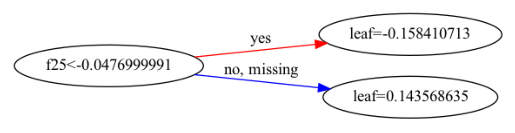

<module 'matplotlib.pyplot' from '/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [6]:
plot_tree_structure(model36_path, tree_index=0)

With more features, the model has more information available to make accurate classifications, potentially capturing complex patterns within the data.

In [7]:
print("\nPredicting for 201 features:")
data = pd.read_csv(example201_path, header=None, sep=',').dropna()
X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0]          # Labels
# predict_with_model(example201_path, model201_path, feature_count=201)
predict_with_model(X, y, model201_path, feature_count=201, params=params, output_shap_plot=False, plot_type='shap_summary')


Predicting for 201 features:
>> Model file example_data/xgbmodel_201.json not found. Training model....
>> XGBoost Test Accuracy (201 features): 1.000000
>> Misclassified Samples (201 features): 0


<Figure size 3000x2400 with 0 Axes>

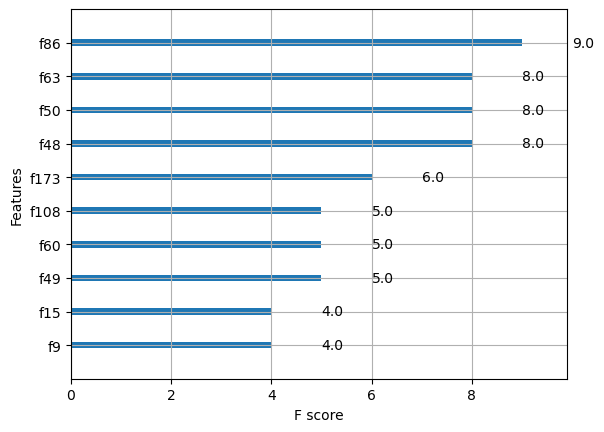

<module 'matplotlib.pyplot' from '/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [8]:
plot_feature_importance(model201_path)

If the model trained on 201 features achieves perfect or near-perfect accuracy, it may be overfitting, especially if tested on the same dataset as training. This is more likely if many features are noisy or irrelevant but still contribute to the model’s classification. High-dimensional models often overfit if there is not enough data or if no regularization is applied.

### How will the increase in the data samples affect the model performance? Will the model be able to generalize well on new data samples?
- __More Training Data__: With more rows, the model has more opportunities to learn the underlying patterns, leading to better generalization on unseen data.
- __Reducing Overfitting__: In cases where the model is overfitting (like potentially with the 201-feature model), adding more data can act as a regularizer, making it less likely to memorize the noise or irrelevant details in the data.
- __Increased Model Stability__: Larger datasets can make the model’s performance more consistent across different test samples, reducing the variance in accuracy.
- __Capturing Complex Patterns__: Some complex relationships in high-dimensional data require a large number of examples to learn effectively. With more data, the model can detect and incorporate these subtle patterns, leading to improved predictive accuracy.
- __Reducing the Effects of Noisy Data__: If some data points are noisy or contain outliers, having more samples can dilute the effect of this noise on the model's learning process.
- __Improving Feature Space Coverage__: For datasets with a lower number of features (like the 36-feature model), more data helps to cover the feature space more comprehensively, making the model better equipped to handle new samples.